In [30]:
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split
from sklearn.grid_search import GridSearchCV
from sklearn import cross_validation
from sklearn.externals import joblib # 学習器をdumpする


In [4]:
# データの読み込み
# iris データで試しに実行してみる
from sklearn.datasets import load_iris
data = load_iris()
features = data['data'] # <type 'numpy.ndarray'> shape (150, 4) 特徴量
feature_names = data['feature_names'] # <type 'list'> 列名
# ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)'
# , 'petal width (cm)']
target = data['target'] # <type 'numpy.ndarray'> shape (150, ) 目的変数
target_names = data['target_names'] # <type 'numpy.ndarray'> shape (3, )
labels = target_names[target] # <type 'numpy.ndarray'> shape (150, ) dtype S10

In [54]:
###  勉強
# 本コードとは関係のない余談
# labels の処理について　
A = np.array([1, 1, 1, 0, 0, 0])
B = np.array(["aaa", "bbb"])
C = B[A]
print C  # 0 = "aaa", 1 = "bbb" Bの配列の順番に割り当てている
###

['bbb' 'bbb' 'bbb' 'aaa' 'aaa' 'aaa']


In [6]:
target.dtype

dtype('int64')

In [7]:
#トレーニングデータとテストデータに分割
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.30)

In [8]:
print train_features.shape
print test_features.shape
print train_labels.shape
print test_labels.shape

(105, 4)
(45, 4)
(105,)
(45,)


In [9]:
# RandomForest 
model_RF = RandomForestClassifier()
model_RF.fit(train_features, train_labels)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [10]:
output = model_RF.predict(test_features)
print output

['versicolor' 'versicolor' 'setosa' 'virginica' 'virginica' 'versicolor'
 'versicolor' 'setosa' 'virginica' 'setosa' 'setosa' 'virginica'
 'virginica' 'versicolor' 'versicolor' 'versicolor' 'setosa' 'virginica'
 'virginica' 'setosa' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'virginica' 'setosa' 'setosa' 'virginica' 'setosa'
 'versicolor' 'setosa' 'virginica' 'virginica' 'versicolor' 'virginica'
 'versicolor' 'setosa' 'virginica' 'versicolor' 'setosa' 'setosa' 'setosa'
 'versicolor' 'setosa']


In [11]:
score_RF = model_RF.score(test_features, test_labels)
print score_RF
# RF 学習器取りあえず完成

0.933333333333


In [12]:
# モデルパラメータの選択

# データをk-分割し、正解率を計算
def get_accuracy(model, train_features, train_labels):
    scores = cross_validation.cross_val_score(model, train_features, train_labels, cv=10)
    print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

# Grid search　パラメータの値をチューニングする
def grid_search(train_features, train_labels):
    param_grid = [
        {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
        {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
    ]

    clf = GridSearchCV(svm.SVC(C=1), param_grid, n_jobs=-1)
    clf.fit(train_features, train_labels)
    print clf.best_estimator_

In [13]:
# cast classに適用する
# データの読み込み
features_nkt = np.loadtxt("features.csv",delimiter=",")

In [14]:
features_nkt.shape

(100, 67)

In [15]:
target_nkt = np.genfromtxt("target.csv", delimiter=',', dtype = np.int)
talent_names = np.genfromtxt("target_names.csv", delimiter=",", dtype = np.str)
target_names_nkt = np.array(["F-rank", "C-rank", "B-rank", "A-rank", "S-rank"], dtype = np.str)
# labels = target_names_nkt[target_nkt]

In [16]:
tmp = target_nkt - 1
target_nkt_bool = tmp.astype(np.int64)
labels_nkt = target_names_nkt[target_nkt_bool]

In [17]:
#トレーニングデータとテストデータに分割
train_features_nkt, test_features_nkt, train_labels_nkt, test_labels_nkt = train_test_split(features_nkt, labels_nkt, test_size = 0.30)

In [18]:
# RandomForest 
model_RF_nkt = RandomForestClassifier()
model_RF_nkt.fit(train_features_nkt, train_labels_nkt)
output_nkt = model_RF_nkt.predict(test_features_nkt)
print output_nkt

['B-rank' 'B-rank' 'B-rank' 'F-rank' 'F-rank' 'B-rank' 'S-rank' 'B-rank'
 'B-rank' 'B-rank' 'S-rank' 'B-rank' 'B-rank' 'S-rank' 'F-rank' 'S-rank'
 'A-rank' 'F-rank' 'S-rank' 'B-rank' 'S-rank' 'B-rank' 'B-rank' 'F-rank'
 'S-rank' 'S-rank' 'S-rank' 'B-rank' 'C-rank' 'A-rank']


In [19]:
score_RF_nkt = model_RF_nkt.score(test_features_nkt, test_labels_nkt)
print score_RF_nkt
# RF 学習器取りあえず完成

0.466666666667


In [20]:
# 日活側からもらったデータで再度検証
# cast classに適用する
# データの読み込み
features_nkt_2 = np.genfromtxt("features_nkt.csv",delimiter=",")
target_nkt_2 = np.genfromtxt("target_nkt.csv", delimiter=',', dtype = np.int)
talent_names_2 = np.genfromtxt("talent_names.csv", delimiter=",", dtype = np.str)
target_names_nkt_2 = np.array(["C-rank", "B-rank", "A-rank", "S-rank"], dtype = np.str)
# labels = target_names_nkt[target_nkt]

In [21]:
tmp = target_nkt_2 - 1
target_nkt_bool_2 = tmp.astype(np.int64)
labels_nkt_2 = target_names_nkt_2[target_nkt_bool_2]

In [22]:
#トレーニングデータとテストデータに分割
train_features_nkt_2, test_features_nkt_2, train_labels_nkt_2, test_labels_nkt_2 = train_test_split(features_nkt_2, labels_nkt_2, test_size = 0.20)

In [23]:
# RandomForest 
model_RF_nkt_2 = RandomForestClassifier()
model_RF_nkt_2.fit(train_features_nkt_2, train_labels_nkt_2)
output_nkt_2 = model_RF_nkt.predict(test_features_nkt_2)
print output_nkt_2

['B-rank' 'B-rank' 'S-rank' 'F-rank' 'A-rank' 'A-rank' 'C-rank' 'A-rank'
 'S-rank' 'B-rank' 'B-rank' 'B-rank' 'S-rank' 'A-rank' 'B-rank' 'B-rank'
 'B-rank' 'B-rank' 'B-rank' 'B-rank' 'F-rank' 'B-rank' 'B-rank' 'B-rank'
 'C-rank' 'S-rank' 'B-rank' 'B-rank' 'S-rank' 'B-rank' 'B-rank' 'B-rank'
 'S-rank' 'B-rank' 'A-rank' 'A-rank' 'B-rank' 'F-rank' 'C-rank' 'A-rank'
 'B-rank' 'A-rank' 'C-rank' 'B-rank' 'F-rank' 'A-rank' 'S-rank' 'B-rank'
 'B-rank' 'C-rank' 'F-rank' 'S-rank' 'B-rank' 'C-rank' 'F-rank' 'B-rank'
 'F-rank' 'B-rank' 'S-rank' 'B-rank' 'F-rank' 'S-rank' 'S-rank' 'B-rank'
 'F-rank' 'S-rank' 'B-rank' 'B-rank' 'A-rank' 'B-rank' 'F-rank' 'C-rank'
 'F-rank' 'S-rank' 'B-rank' 'B-rank' 'B-rank' 'A-rank' 'B-rank' 'S-rank'
 'B-rank' 'B-rank' 'F-rank' 'B-rank' 'S-rank' 'B-rank' 'C-rank' 'B-rank'
 'S-rank' 'F-rank' 'B-rank' 'F-rank' 'B-rank' 'C-rank' 'C-rank' 'A-rank'
 'S-rank' 'B-rank' 'B-rank' 'A-rank' 'B-rank' 'S-rank' 'B-rank' 'S-rank'
 'F-rank' 'B-rank' 'B-rank' 'C-rank' 'B-rank' 'B-ra

In [29]:
score_RF_nkt_2 = model_RF_nkt_2.score(test_features_nkt_2, test_labels_nkt_2)
print score_RF_nkt_2
# RF 学習器取りあえず完成

0.831223628692


In [31]:
# def get_accuracy(model, train_features, train_labels):
#     scores = cross_validation.cross_val_score(model, train_features, train_labels, cv=10)
#     print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
# 上で作った関数を用いて計算してみる
accuracy = get_accuracy(model_RF_nkt_2, train_features_nkt_2, train_labels_nkt_2)

Accuracy: 0.83 (+/- 0.06)


In [32]:
# class sklearn.ensemble.RandomForestClassifier(
#     n_estimators=10, 
#     criterion='gini', 
#     max_depth=None, 
#     min_samples_split=2, 
#     min_samples_leaf=1, 
#     max_features='auto', 
#     max_leaf_nodes=None, 
#     bootstrap=True, 
#     oob_score=False, 
#     n_jobs=1, 
#     random_state=None, 
#     verbose=0, 
#     min_density=None, 
#     compute_importances=None
#     )

In [42]:
# RFのパラメータをチューニングする
# parameters = {
#         'n_estimators'      : [100, 300, 500, 1000],
#         'max_features'      : [3, 5, 10, 15, 20, 25],
#         'max_depth'         : [3, 5, 10, 15, 20, 25, 30]
# }
# model = GridSearchCV(RandomForestClassifier(), parameters)
# model.fit(train_features_nkt_2, train_labels_nkt_2) 
# print(model.best_estimator_)

In [33]:
# グリッドサーチした結果のパラメータを用いてモデリング
model_RF_nkt_3 = RandomForestClassifier(max_depth=15, max_features=3, n_estimators=500)
model_RF_nkt_3.fit(train_features_nkt_2, train_labels_nkt_2) 
output_nkt_3 = model_RF_nkt_3.predict(test_features_nkt_2)
print output_nkt_3

['C-rank' 'C-rank' 'C-rank' 'C-rank' 'C-rank' 'C-rank' 'C-rank' 'C-rank'
 'A-rank' 'C-rank' 'C-rank' 'C-rank' 'A-rank' 'C-rank' 'C-rank' 'C-rank'
 'C-rank' 'C-rank' 'C-rank' 'C-rank' 'C-rank' 'C-rank' 'C-rank' 'C-rank'
 'C-rank' 'B-rank' 'C-rank' 'C-rank' 'B-rank' 'C-rank' 'C-rank' 'C-rank'
 'A-rank' 'C-rank' 'B-rank' 'C-rank' 'C-rank' 'C-rank' 'C-rank' 'C-rank'
 'C-rank' 'B-rank' 'C-rank' 'C-rank' 'B-rank' 'C-rank' 'B-rank' 'C-rank'
 'C-rank' 'B-rank' 'C-rank' 'A-rank' 'C-rank' 'C-rank' 'C-rank' 'C-rank'
 'C-rank' 'C-rank' 'C-rank' 'C-rank' 'C-rank' 'A-rank' 'A-rank' 'C-rank'
 'C-rank' 'A-rank' 'C-rank' 'C-rank' 'C-rank' 'C-rank' 'C-rank' 'C-rank'
 'C-rank' 'C-rank' 'C-rank' 'C-rank' 'C-rank' 'C-rank' 'C-rank' 'C-rank'
 'C-rank' 'C-rank' 'C-rank' 'C-rank' 'B-rank' 'C-rank' 'C-rank' 'C-rank'
 'A-rank' 'B-rank' 'C-rank' 'C-rank' 'C-rank' 'C-rank' 'C-rank' 'B-rank'
 'B-rank' 'C-rank' 'C-rank' 'B-rank' 'C-rank' 'A-rank' 'C-rank' 'A-rank'
 'C-rank' 'C-rank' 'C-rank' 'C-rank' 'C-rank' 'C-ra

In [34]:
importances = model_RF_nkt_3.feature_importances_
print importances
print importances.shape

[ 0.0040968   0.00568767  0.00382042  0.01002469  0.00889647  0.00290448
  0.0032355   0.00344609  0.00753889  0.01339956  0.00083716  0.00322463
  0.00442478  0.00158237  0.00741374  0.00773174  0.00803703  0.01200244
  0.01657086  0.01190718  0.00550345  0.00435702  0.0056725   0.0050547
  0.00430357  0.00580824  0.00172487  0.00144224  0.00077648  0.00029582
  0.00208145  0.00901607  0.00113913  0.00072109  0.00674741  0.
  0.00021488  0.00039802  0.00039954  0.00027411  0.02931028  0.03119041
  0.03953949  0.07130087  0.0788931   0.07473916  0.02708314  0.03879075
  0.03339834  0.02929462  0.03925943  0.03702567  0.02152142  0.0258204
  0.03271193  0.02493191  0.02584437  0.03190242  0.02063702  0.02660304
  0.02348239  0.01151447  0.01168598  0.01285131  0.00058307  0.00133007
  0.00604186]
(67,)


In [35]:
accuracy_2 = get_accuracy(model_RF_nkt_3, train_features_nkt_2, train_labels_nkt_2)

Accuracy: 0.86 (+/- 0.05)


今回のベスト推定精度！

In [36]:
# 列名の取得
features_names_nkt_2 = np.genfromtxt("features_names.csv",delimiter=",", dtype = np.str)

In [37]:
features_names_nkt_2

array(['max_talentranking_sharp_rise_act_nikkei_term3',
       'max_talentranking_sharp_rise_actress_nikkei_term2',
       'max_talentranking_sharp_rise_actress_nikkei_term3',
       'max_talentranking_total_act_nikkei_term2',
       'max_talentranking_total_act_nikkei_term3',
       'max_talentranking_total_act_oricon_term1',
       'max_talentranking_total_act_oricon_term2',
       'max_talentranking_total_act_oricon_term3',
       'max_talentranking_total_actress_nikkei_term2',
       'max_talentranking_total_actress_nikkei_term3',
       'max_talentranking_total_actress_oricon_term1',
       'max_talentranking_total_actress_oricon_term2',
       'max_talentranking_total_actress_oricon_term3',
       'max_talentranking_total_nikkei_term1',
       'mean_cm_appearance_ranking_term1',
       'mean_cm_appearance_ranking_term2',
       'mean_cm_appearance_ranking_term3',
       'mean_drama_max_view_point_main_category1_term1',
       'mean_drama_max_view_point_main_category1_term2',
    

In [38]:
# 結合
col =["values"]
importances_ = pd.DataFrame(
    data = importances, index = features_names_nkt_2, columns = col)

In [39]:
print importances_.sort("values", ascending=False)

                                                     values
mean_gtrend_term2                                  0.078893
mean_gtrend_term3                                  0.074739
mean_gtrend_term1                                  0.071301
mean_drama_max_view_point_sub_term3                0.039539
mean_screen_avg_max_main_term2                     0.039259
mean_movie_max_revenue_main_term2                  0.038791
mean_screen_avg_max_main_term3                     0.037026
mean_movie_max_revenue_main_term3                  0.033398
sum_drama_appearance_cnt_main_term3                0.032712
sum_drama_appearance_cnt_sub_term3                 0.031902
mean_drama_max_view_point_sub_term2                0.031190
mean_drama_max_view_point_sub_term1                0.029310
mean_screen_avg_max_main_term1                     0.029295
mean_movie_max_revenue_main_term1                  0.027083
sum_movie_appearance_cnt_main_term2                0.026603
sum_drama_appearance_cnt_sub_term2      

/Users/DS/.pyenv/versions/anaconda2-2.5.0/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [67]:
# write csv
# importances_.sort("values", ascending=False).to_csv('RF3_importances.csv')

/Users/DS/.pyenv/versions/anaconda2-2.5.0/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


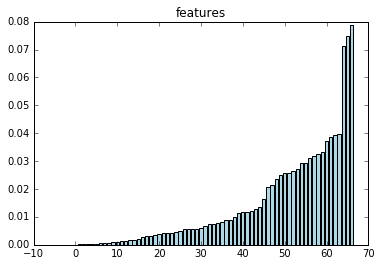

In [41]:
plt.title('features')
plt.bar(range(features_names_nkt_2.shape[0]),
        importances[np.argsort(importances)[::1]],
        color='lightblue', align = 'center'
       )
plt.show()

重要度を右から高い順位並べました

※x軸は列番号を示しています

In [65]:
# 重要度の選別
# x_selected = model_RF_nkt_3.transform(features_nkt_2, threshol = 0.05)

In [55]:
# 試しにSVMでやってみる
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
C = 1.
kernel = 'rbf'
gamma  = 0.01
estimator = SVC(C=C, kernel=kernel, gamma=gamma)

In [56]:
# fitting
SVM_model = OneVsRestClassifier(estimator)
SVM_model.fit(train_features_nkt_2, train_labels_nkt_2) 
output_nkt_3 = SVM_model.predict(test_features_nkt_2)
print output_nkt_3

['C-rank' 'C-rank' 'B-rank' 'C-rank' 'B-rank' 'B-rank' 'C-rank' 'B-rank'
 'B-rank' 'C-rank' 'B-rank' 'C-rank' 'B-rank' 'C-rank' 'C-rank' 'C-rank'
 'C-rank' 'B-rank' 'C-rank' 'C-rank' 'C-rank' 'C-rank' 'C-rank' 'C-rank'
 'C-rank' 'B-rank' 'B-rank' 'C-rank' 'B-rank' 'C-rank' 'C-rank' 'C-rank'
 'B-rank' 'C-rank' 'B-rank' 'C-rank' 'C-rank' 'C-rank' 'C-rank' 'C-rank'
 'C-rank' 'C-rank' 'C-rank' 'C-rank' 'B-rank' 'C-rank' 'B-rank' 'C-rank'
 'C-rank' 'B-rank' 'C-rank' 'B-rank' 'C-rank' 'C-rank' 'C-rank' 'C-rank'
 'C-rank' 'C-rank' 'C-rank' 'C-rank' 'C-rank' 'A-rank' 'B-rank' 'C-rank'
 'C-rank' 'B-rank' 'C-rank' 'C-rank' 'B-rank' 'C-rank' 'C-rank' 'C-rank'
 'B-rank' 'C-rank' 'C-rank' 'C-rank' 'C-rank' 'B-rank' 'C-rank' 'C-rank'
 'C-rank' 'C-rank' 'C-rank' 'C-rank' 'B-rank' 'C-rank' 'C-rank' 'C-rank'
 'B-rank' 'B-rank' 'C-rank' 'C-rank' 'C-rank' 'B-rank' 'C-rank' 'C-rank'
 'B-rank' 'C-rank' 'C-rank' 'B-rank' 'C-rank' 'B-rank' 'B-rank' 'A-rank'
 'C-rank' 'C-rank' 'C-rank' 'B-rank' 'C-rank' 'C-ra

In [57]:
accuracy = get_accuracy(SVM_model, train_features_nkt_2, train_labels_nkt_2)

Accuracy: 0.75 (+/- 0.04)


In [58]:
# grid search
tuned_parameters = {
    'C': [1, 10, 100, 1000], 
    'kernel': ['rbf'], 
    'gamma': [0.01, 0.001, 0.0001]
    }
# estimator_ = SVC()
# SVM = OneVsRestClassifier(estimator_)
SVM_model_2 = GridSearchCV(SVC(), tuned_parameters)
SVM_model_2.fit(train_features_nkt_2, train_labels_nkt_2) 
 
print SVM_model_2.best_estimator_

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [60]:
# グリッドサーチしたSVMを再度、正解率を計算する
estimator_gridsearched = SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
                decision_function_shape=None, degree=3, gamma=0.01, 
                kernel='rbf',max_iter=-1, probability=False, 
                random_state=None, shrinking=True, tol=0.001, verbose=False)
SVM_model_gridsearched = OneVsRestClassifier(estimator_gridsearched)
accuracy_gridsearched = get_accuracy(SVM_model_gridsearched
                        , train_features_nkt_2, train_labels_nkt_2)

Accuracy: 0.75 (+/- 0.04)


だめだ 

In [63]:
# 学習結果の保存
joblib.dump(model_RF_nkt_3, './model/model_2')

['./model/model_2',
 './model/model_2_01.npy',
 './model/model_2_02.npy',
 './model/model_2_03.npy',
 './model/model_2_04.npy',
 './model/model_2_05.npy',
 './model/model_2_06.npy',
 './model/model_2_07.npy',
 './model/model_2_08.npy',
 './model/model_2_09.npy',
 './model/model_2_10.npy',
 './model/model_2_11.npy',
 './model/model_2_12.npy',
 './model/model_2_13.npy',
 './model/model_2_14.npy',
 './model/model_2_15.npy',
 './model/model_2_16.npy',
 './model/model_2_17.npy',
 './model/model_2_18.npy',
 './model/model_2_19.npy',
 './model/model_2_20.npy',
 './model/model_2_21.npy',
 './model/model_2_22.npy',
 './model/model_2_23.npy',
 './model/model_2_24.npy',
 './model/model_2_25.npy',
 './model/model_2_26.npy',
 './model/model_2_27.npy',
 './model/model_2_28.npy',
 './model/model_2_29.npy',
 './model/model_2_30.npy',
 './model/model_2_31.npy',
 './model/model_2_32.npy',
 './model/model_2_33.npy',
 './model/model_2_34.npy',
 './model/model_2_35.npy',
 './model/model_2_36.npy',
 './mode